# 1: Load and Explore Dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('Mall_Customers.csv')
print(df.head())
print(df.info())




   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [19]:
# Load dataset
df = pd.read_csv('Mall_Customers.csv')

# Rename columns (if necessary)
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Encode Gender (optional)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select relevant features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 2: Fit K-Means and Assign Cluster Labels

In [20]:
from sklearn.cluster import KMeans

# Fit KMeans with arbitrary k=5
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(data)


# 3: Elbow Method to Find Optimal K

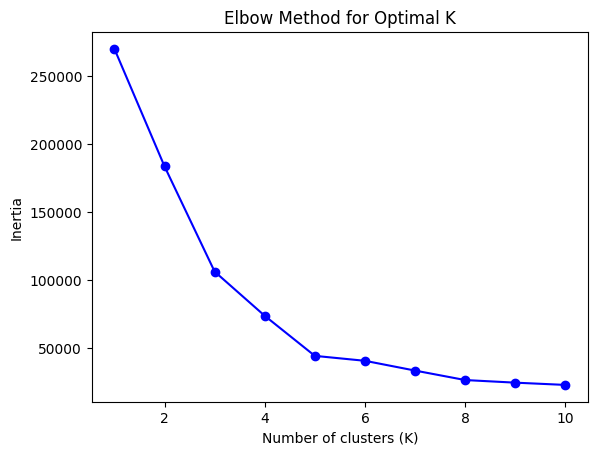

In [21]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data)
    inertia.append(km.inertia_)

# Plot elbow
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


# 4: Visualize Clusters

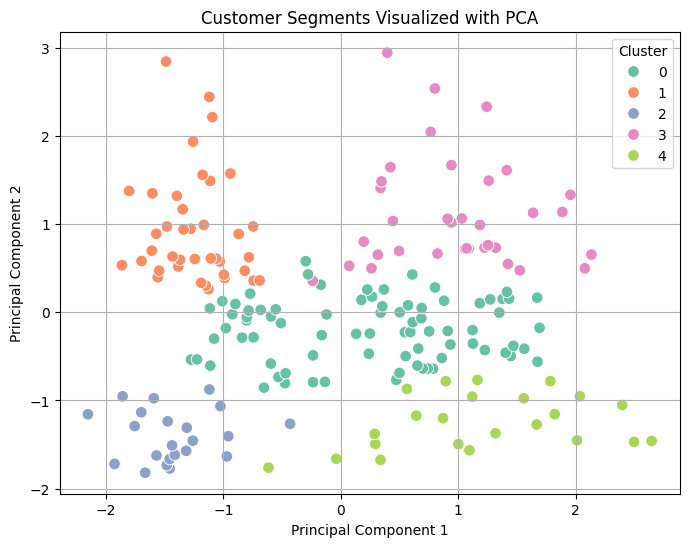

In [22]:
# Fit with optimal K (e.g., K=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(data)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:,0]
df['PCA2'] = X_pca[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=70)
plt.title('Customer Segments Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


# 5: Evaluate Clustering Using Silhouette Score

In [24]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data, df['Cluster'])
print("Silhouette Score:", score)


Silhouette Score: 0.553931997444648


# 6: Cluster-wise Insights

C:\Users\yugth\AppData\Local\Temp\ipykernel_16084\2033436710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Cluster', palette='Set3')


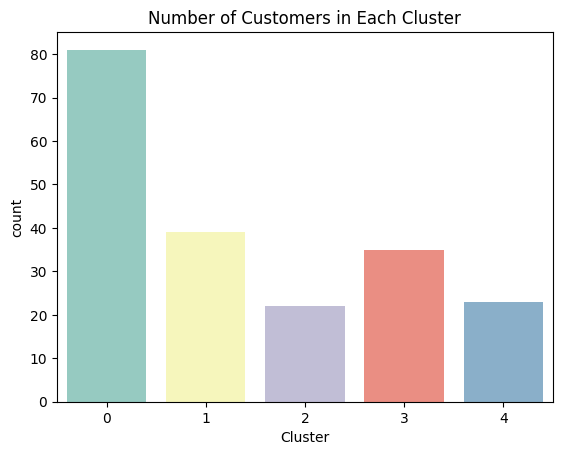

In [25]:

# Cluster Distribution
sns.countplot(data=df, x='Cluster', palette='Set3')
plt.title('Number of Customers in Each Cluster')
plt.show()


C:\Users\yugth\AppData\Local\Temp\ipykernel_16084\1619053166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Cluster', y='Spending Score (1-100)', palette='coolwarm')


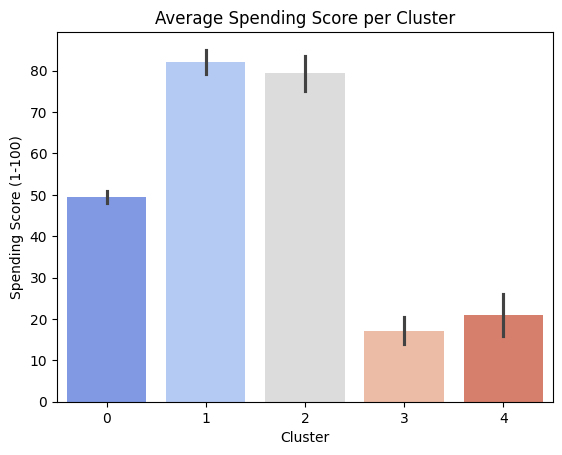

In [27]:
#Average Spending by Cluster
sns.barplot(data=df, x='Cluster', y='Spending Score (1-100)', palette='coolwarm')
plt.title('Average Spending Score per Cluster')
plt.show()


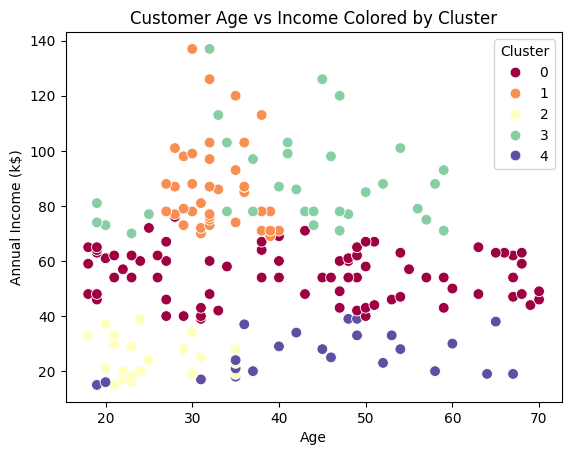

In [28]:
#Age vs. Income by Cluster
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Cluster', palette='Spectral', s=60)
plt.title('Customer Age vs Income Colored by Cluster')
plt.show()


# Saved CSV File (Clustered Data)

In [29]:
df.to_csv("Clustered_Mall_Customers.csv", index=False)